# Portfolio Allocation & Sharpe Ratio

In [73]:
import numpy as np
import pandas as pd
import yfinance as yf

In [74]:
start = pd.to_datetime('2020-01-01')
end = pd.to_datetime('2025-01-01')

In [75]:
apple = yf.download('AAPL',start=start,end=end,auto_adjust=False)['Adj Close']
cisco = yf.download('CSCO',start=start,end=end,auto_adjust=False)['Adj Close']
ibm = yf.download('IBM',start=start,end=end,auto_adjust=False)['Adj Close']
amazon = yf.download('AMZN',start=start,end=end,auto_adjust=False)['Adj Close']

for stock in [apple, cisco, ibm, amazon]:
    stock.columns = ['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [76]:
apple

,Adj Close
Date,
2020-01-02,72.468254
2020-01-03,71.763733
2020-01-06,72.335533
2020-01-07,71.995354
2020-01-08,73.153496
...,...
2024-12-24,257.037506
2024-12-26,257.853760
2024-12-27,254.439224


In [77]:
apple.iloc[0]['Adj Close']

np.float64(72.46825408935547)

In [78]:
for stock_df in (apple,cisco,ibm,amazon):
    stock_df['Normed Return'] = stock_df['Adj Close'] / stock_df.iloc[0]['Adj Close']

In [81]:
apple.tail()

,Adj Close,Normed Return
Date,,
2024-12-24,257.037506,3.546898
2024-12-26,257.853760,3.558162
2024-12-27,254.439224,3.511044
2024-12-30,251.064484,3.464475
2024-12-31,249.292496,3.440023


In [82]:
for stock_df in (cisco, ibm, amazon):
    if 'Normerd Return' in stock_df.columns:
        del stock_df['Normerd Return']


## **Allocation**
- 30% in apple
- 20% in cisco
- 40% in amazon
- 10% in ibm

In [83]:
list(zip((apple,cisco,ibm,amazon),[.3,.2,.4,.1]))

[(             Adj Close  Normed Return
  Date                                 
  2020-01-02   72.468254       1.000000
  2020-01-03   71.763733       0.990278
  2020-01-06   72.335533       0.998169
  2020-01-07   71.995354       0.993474
  2020-01-08   73.153496       1.009456
  ...                ...            ...
  2024-12-24  257.037506       3.546898
  2024-12-26  257.853760       3.558162
  2024-12-27  254.439224       3.511044
  2024-12-30  251.064484       3.464475
  2024-12-31  249.292496       3.440023
  
  [1258 rows x 2 columns],
  0.3),
 (            Adj Close  Normed Return
  Date                                
  2020-01-02  40.688911       1.000000
  2020-01-03  40.025047       0.983684
  2020-01-06  40.167900       0.987195
  2020-01-07  39.907406       0.980793
  2020-01-08  39.932610       0.981413
  ...               ...            ...
  2024-12-24  58.345390       1.433938
  2024-12-26  58.472118       1.437053
  2024-12-27  58.111423       1.428188
  2024-12-30 

In [84]:
for stock_df , allo in zip((apple,cisco,ibm,amazon),[.3,.2,.4,.1]):
    stock_df['Allocation'] =  stock_df['Normed Return'] * allo

In [85]:
apple.head()

,Adj Close,Normed Return,Allocation
Date,,,
2020-01-02,72.468254,1.000000,0.300000
2020-01-03,71.763733,0.990278,0.297083
2020-01-06,72.335533,0.998169,0.299451
2020-01-07,71.995354,0.993474,0.298042
2020-01-08,73.153496,1.009456,0.302837


In [86]:
for stock_df in (apple,cisco,ibm,amazon):
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

In [87]:
apple.head()

,Adj Close,Normed Return,Allocation,Position Values
Date,,,,
2020-01-02,72.468254,1.000000,0.300000,300000.000000
2020-01-03,71.763733,0.990278,0.297083,297083.462871
2020-01-06,72.335533,0.998169,0.299451,299450.569292
2020-01-07,71.995354,0.993474,0.298042,298042.313576
2020-01-08,73.153496,1.009456,0.302837,302836.725023


In [88]:
all_pos_vals = [
    apple['Position Values'],
    cisco['Position Values'],
    ibm['Position Values'],
    amazon['Position Values']
]
    
portfolio_val = pd.concat(all_pos_vals,axis=1)

In [89]:
portfolio_val

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2020-01-02,3.000000e+05,200000.000000,400000.000000,100000.000000
2020-01-03,2.970835e+05,196736.879350,396810.008878,98786.096534
2020-01-06,2.994506e+05,197439.049932,396101.030422,100256.584278
2020-01-07,2.980423e+05,196158.631150,396366.771475,100466.282996
2020-01-08,3.028367e+05,196282.516031,399675.154524,99681.777934
...,...,...,...,...
2024-12-24,1.064069e+06,286787.668964,874911.026789,241358.063697
2024-12-26,1.067448e+06,287410.580973,876782.412574,239250.593184
2024-12-27,1.053313e+06,285637.641503,868556.126546,235773.263622


In [90]:
portfolio_val.columns = ['AAPL Pos','CSCO Pos','IBM Pos','AMZN Pos']

In [91]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2020-01-02,3.000000e+05,200000.000000,400000.000000,100000.000000,1.000000e+06
2020-01-03,2.970835e+05,196736.879350,396810.008878,98786.096534,9.894164e+05
2020-01-06,2.994506e+05,197439.049932,396101.030422,100256.584278,9.932472e+05
2020-01-07,2.980423e+05,196158.631150,396366.771475,100466.282996,9.910340e+05
2020-01-08,3.028367e+05,196282.516031,399675.154524,99681.777934,9.984762e+05
...,...,...,...,...,...
2024-12-24,1.064069e+06,286787.668964,874911.026789,241358.063697,2.467126e+06
2024-12-26,1.067448e+06,287410.580973,876782.412574,239250.593184,2.470892e+06
2024-12-27,1.053313e+06,285637.641503,868556.126546,235773.263622,2.443280e+06


In [92]:
import matplotlib.pyplot as plt

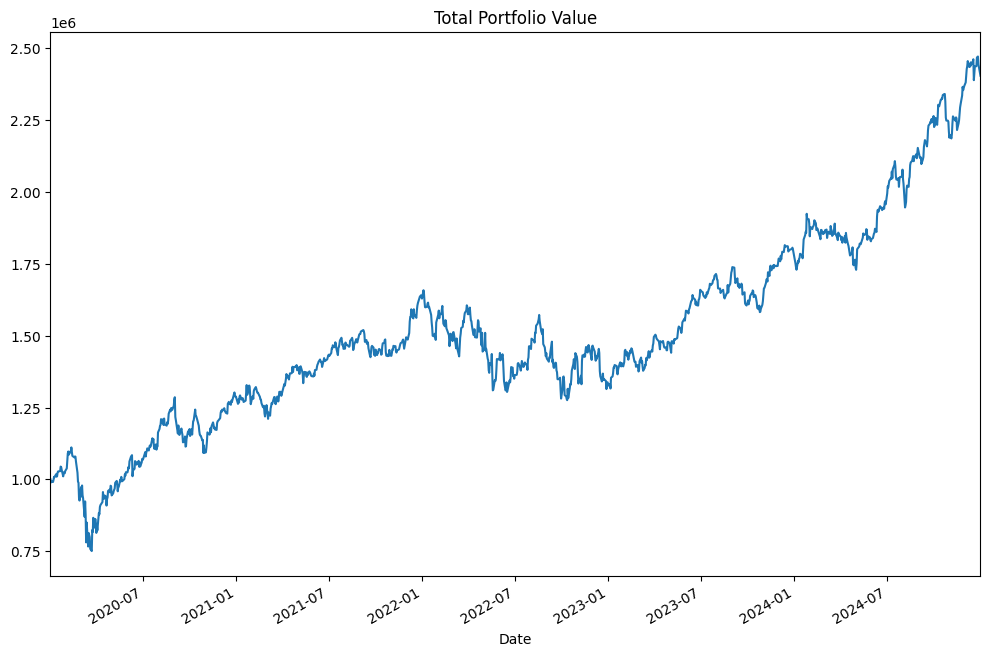

In [93]:
portfolio_val['Total Pos'].plot(figsize=(12,8))

plt.title('Total Portfolio Value')
plt.margins(x=0)
plt.show()

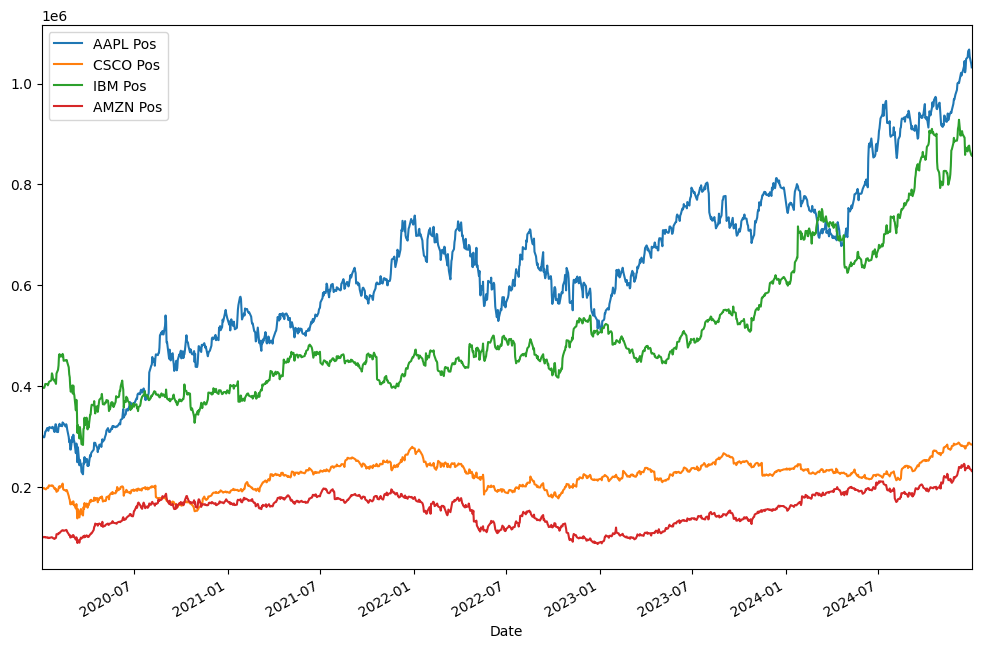

In [94]:
portfolio_val[['AAPL Pos','CSCO Pos','IBM Pos','AMZN Pos']].plot(figsize=(12,8))

# plt.title('Total Portfolio Value')
plt.margins(x=0)
plt.show()

## **Portolio Stats**

In [95]:
portfolio_val.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2020-01-02,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000
2020-01-03,297083.462871,196736.879350,396810.008878,98786.096534,989416.447633
2020-01-06,299450.569292,197439.049932,396101.030422,100256.584278,993247.233923
2020-01-07,298042.313576,196158.631150,396366.771475,100466.282996,991033.999197
2020-01-08,302836.725023,196282.516031,399675.154524,99681.777934,998476.173512


In [96]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val.head()

,AAPL Pos,CSCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2020-01-02,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000,NaN
2020-01-03,297083.462871,196736.879350,396810.008878,98786.096534,989416.447633,-0.010584
2020-01-06,299450.569292,197439.049932,396101.030422,100256.584278,993247.233923,0.003872
2020-01-07,298042.313576,196158.631150,396366.771475,100466.282996,991033.999197,-0.002228
2020-01-08,302836.725023,196282.516031,399675.154524,99681.777934,998476.173512,0.007510


In [97]:
portfolio_val['Daily Return'].mean()

np.float64(0.0008086632409834972)

In [98]:
portfolio_val['Daily Return'].std()

np.float64(0.01485714085524603)

In [99]:
portfolio_val['Daily Return'].describe().to_frame()

,Daily Return
count,1257.000000
mean,0.000809
std,0.014857
min,-0.109465
25%,-0.005991
50%,0.001049
75%,0.008225
max,0.097232


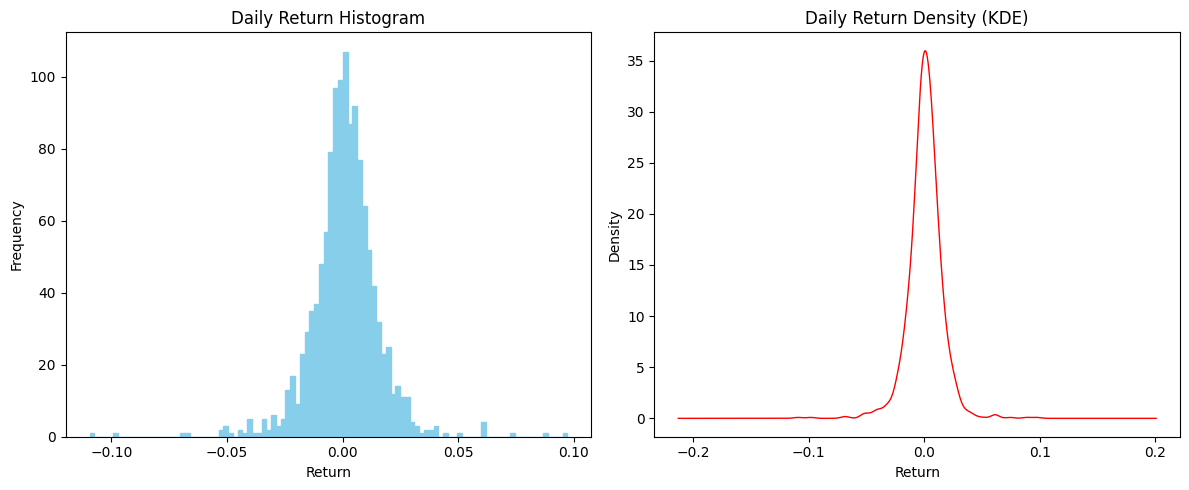

In [100]:
# portfolio_val['Daily Return'].plot(kind='hist',bins=100,figsize=(4,5));


# 1. 도화지(Figure)와 축(Axes)을 1행 2열로 준비합니다.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# 2. 첫 번째 칸(axes[0])에 히스토그램을 그립니다.
portfolio_val['Daily Return'].plot(kind='hist', bins=100, ax=axes[0], color='skyblue', edgecolor='skyblue')
axes[0].set_title('Daily Return Histogram')
axes[0].set_xlabel('Return')

# 3. 두 번째 칸(axes[1])에 KDE 곡선을 그립니다.
portfolio_val['Daily Return'].plot(kind='kde', ax=axes[1], color='red', lw=1)
axes[1].set_title('Daily Return Density (KDE)')
axes[1].set_xlabel('Return')

# 레이아웃이 겹치지 않게 조정합니다.
plt.tight_layout()
plt.show()

In [101]:
cumulative_return = 100 * (portfolio_val['Total Pos'].iloc[-1] / portfolio_val['Total Pos'].iloc[0] - 1)
cumulative_return

np.float64(140.39139980268445)

In [102]:
portfolio_val['Total Pos'].iloc[-1]

np.float64(2403913.9980268446)

### **Share Ratio**

In [103]:
# 일간 샤프 지수
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [104]:
SR

np.float64(0.05442926393862381)

In [105]:
# 월간 샤프 지수(Annualized)
ASR = (252 ** 0.5) * SR
ASR

np.float64(0.8640377785553676)

In [108]:
ibm

,Adj Close,Normed Return,Allocation,Position Values
Date,,,,
2020-01-02,100.013748,1.000000,0.400000,400000.000000
2020-01-03,99.216141,0.992025,0.396810,396810.008878
2020-01-06,99.038872,0.990253,0.396101,396101.030422
2020-01-07,99.105316,0.990917,0.396367,396366.771475
2020-01-08,99.932526,0.999188,0.399675,399675.154524
...,...,...,...,...
2024-12-24,218.757828,2.187278,0.874911,874911.026789
2024-12-26,219.225739,2.191956,0.876782,876782.412574
2024-12-27,217.168884,2.171390,0.868556,868556.126546
